In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
application_train = pd.read_csv('../../../../homecredit/application_train.csv')
# POS= pd.read_csv("../../../../homecredit/POS_CASH_balance.csv")
# previous_application = pd.read_csv("../../../homecredit/previous_application.csv")
# credit_card_balance= pd.read_csv("../../../homecredit/credit_card_balance.csv")
installments = pd.read_csv("../../../../homecredit/installments_payments.csv")

##### "Home credit"提供每位客戶的"每筆"貸款分期資料
##### 一個人可能有多筆貸款資料(1個SK_ID_CURR可能有多筆不同的SK_ID_PREV)
##### 貸款版本、合約分幾期、當期貸款應繳日期(距今多少天前)、當期貸款入帳日期(距今多少天前)、當期貸款應繳金額、當期貸款入帳金額

In [3]:
installments = installments.sort_values(by=['SK_ID_CURR','SK_ID_PREV']) 
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
...,...,...,...,...,...,...,...,...
13582873,2631384,456255,3.0,12,-426.0,-435.0,27489.690,27489.690
13599889,2631384,456255,3.0,9,-516.0,-523.0,27489.690,27489.690
12075210,2729207,456255,2.0,3,-409.0,-435.0,42754.230,42754.230
12300604,2729207,456255,1.0,1,-469.0,-482.0,11514.555,11514.555


<Axes: ylabel='Frequency'>

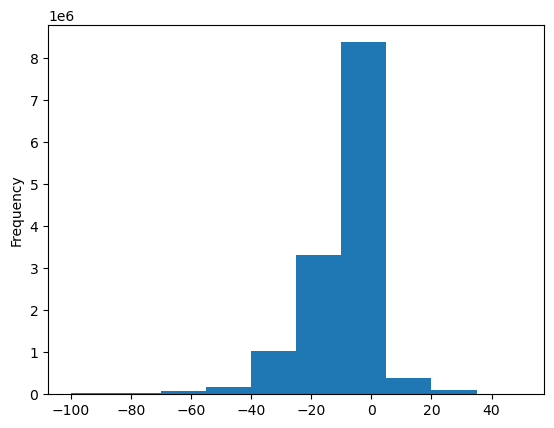

In [4]:
#overdue_DAY 正數為遲繳(天數)，負數為提前繳(天數)
overdue_DAY = installments.DAYS_ENTRY_PAYMENT - installments.DAYS_INSTALMENT
overdue_DAY.plot.hist(range=(-100,50))
#大部分繳款天數都提前30天內繳(合理)

0.013185719406579784

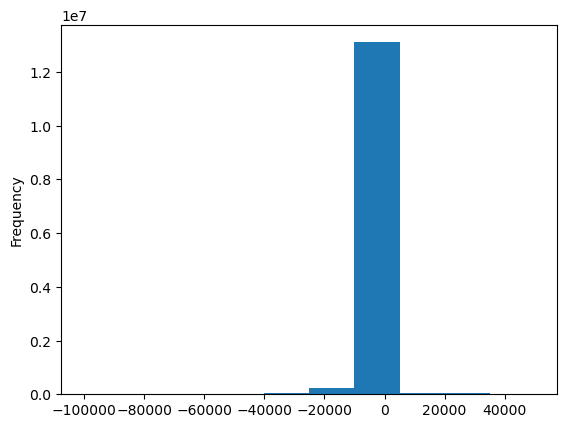

In [5]:
#overdue_AMT 正數表示多繳，負數表示少繳
overdue_AMT = installments.AMT_PAYMENT -installments.AMT_INSTALMENT
overdue_AMT.plot.hist(range=(-100000,50000))
(overdue_AMT>0).sum()/overdue_AMT.shape[0]
#竟然有期數多繳款，但總共179397筆，佔總筆數1.3%

In [19]:
#合併到indstalments表格
installments['overdue_day'] = overdue_DAY
installments['overdue_AMT'] = overdue_AMT
installments = installments.groupby("SK_ID_CURR").mean()
installments.columns

Index(['SK_ID_PREV', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER',
       'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT', 'overdue_day', 'overdue_AMT'],
      dtype='object')